In [1]:
import pandas as pd
import numpy as np

In [2]:
import altair as alt # Python wrapper for Vega-Lite visualisation grammar

In [3]:
# list of python modules that appear NLP/ML related imported by 2 or more of the selected projects
nlp_libs = [
    "numpy",
    "tensorflow",
    "sklearn",
    "nltk",
    "gensim", # Topic modelling for humans
    "scipy",
    "keras",
    "torch",
    "spacy", # Industrial-Strength Natural Language Processing
    "jieba", # Python Chinese word segmentation module
    "torchtext", # data processing utilities and popular datasets for natural language
    "tensorboardX", # tensorboard for pytorch (and chainer, mxnet, numpy, ...)
    "text_cnn", # not on pip, but module was copy-pasted into multiple repos
    "textblob", # simple API for ... part-of-speech tagging, noun phrase extraction, sentiment analysis, ...
    "pytorch_pretrained_bert",
    "apex", # NVIDIA/apex: easy mixed precision and distributed training in Pytorch
    "tflearn", # higher-level API for TensorFlow
    "frog", # Python binding to FROG, an NLP suite for Dutch doing part-of-speech tagging, lemmatisation ...
    "theano", # define, optimize, and evaluate mathematical expressions involving multi-dimensional arrays
    "pymorphy2", # Morphological analyzer / inflection engine for Russian and Ukrainian languages
    "speech_recognition", # speech recognition, with support for several engines and APIs, online and offline
    "allennlp" # surprisingly, was only used by allennlp project itself! However, listed here because it is a substantial framework.
]

In [9]:
proj_imports = pd.read_csv("../output/imports-project-tally.csv", header=None, names=["repo", "lib", "cnt"]).sort_values(by = ["cnt"], ascending=False)
proj_imports

,repo,lib,cnt
823,91356408,allennlp,3242
1123,21467110,spacy,1135
1187,21467110,symbols,682
827,91356408,torch,445
336,52581991,snorkel,334
...,...,...,...
849,91356408,numpydoc,1
822,2240410,unittest,1
820,2240410,sys,1
819,2240410,string,1


In [10]:
proj_imports.nunique()

repo     89
lib     602
cnt      84
dtype: int64

In [11]:
num_repos = proj_imports.nunique()["repo"]
num_repos

89

In [12]:
proj_imports["lib"].iloc[0]

'allennlp'

In [13]:
proj_imports["lib"].isin(nlp_libs)

823      True
1123     True
1187    False
827      True
336     False
        ...  
849     False
822     False
820     False
819     False
951     False
Name: lib, Length: 1903, dtype: bool

In [14]:
nlp_libs_short = [
    "tensorflow",
    "sklearn",
    "keras",
    "tflearn",
    "torch",
    "torchtext", # all projects with torchtext also import torch
    "apex",
    "theano",
    "pytorch_pretrained_bert"
    #"nltk",
    #"gensim", # Topic modelling for humans
    #"spacy", # Industrial-Strength Natural Language Processing
]

In [15]:
# Assumption: at least one library (e.g. 'os') will be imported.
#proj_imports_filt = proj_imports[proj_imports["lib"].isin(nlp_libs)]
#proj_imports_filt = proj_imports[proj_imports["lib"].isin(nlp_libs)]
proj_imports_filt = proj_imports # filter later

import_sets = []
proj_imports_grouped = proj_imports_filt.groupby("repo")
for repo,repo_df in proj_imports_grouped:
    libs_set = tuple(sorted(set(repo_df["lib"]) & set(nlp_libs))) # empty tuple if none
    import_sets.append([repo, libs_set])

import_sets_df = pd.DataFrame.from_records(import_sets, columns=["repo", "importset"])

In [16]:
import_sets_df

,repo,importset
0,759484,"(numpy, sklearn)"
1,2240410,()
2,3129447,()
3,3255194,()
4,3546355,()
...,...,...
84,111696541,"(numpy, tensorflow)"
85,112664267,"(apex, numpy, sklearn, torch)"
86,114098658,"(numpy, pytorch_pretrained_bert, sklearn, torc..."
87,118248283,"(numpy, tensorboardX, torch)"


In [17]:
import_sets_df.groupby("importset").count().sort_values("repo", ascending=False)

,repo
importset,
(),19
"(numpy, tensorflow)",8
"(numpy, sklearn, tensorflow)",3
"(nltk,)",3
"(nltk, numpy, sklearn)",2
"(nltk, sklearn)",2
"(numpy,)",2
"(numpy, torch, torchtext)",2
"(keras, numpy)",2


In [18]:
proj_imports_grouped

In [19]:
# Labelling repos as ML or non-ML
# Todo: Analyse at module level instead of repo level

In [25]:
proj_imports[proj_imports["repo"] == 91356408]

,repo,lib,cnt
823,91356408,allennlp,3242
827,91356408,torch,445
832,91356408,typing,277
824,91356408,numpy,170
831,91356408,overrides,165
...,...,...,...
858,91356408,zlib,1
856,91356408,urllib,1
853,91356408,hashlib,1
850,91356408,boto3,1


In [61]:
import_sets_df["importset"].map(lambda t: (set(t) & set(nlp_libs_short)))

0                                             {sklearn}
1                                                    {}
2                                                    {}
3                                                    {}
4                                                    {}
                            ...                        
84                                         {tensorflow}
85                               {apex, sklearn, torch}
86    {torch, sklearn, pytorch_pretrained_bert, torc...
87                                              {torch}
88                                         {tensorflow}
Name: importset, Length: 89, dtype: object

In [62]:
import_sets_df[import_sets_df["importset"].map(lambda t: (set(t) & set(nlp_libs_short))) == set({})]

,repo,importset,isML
1,2240410,(),2.24041e+06
2,3129447,(),3.12945e+06
3,3255194,(),3.25519e+06
4,3546355,(),3.54636e+06
5,5651850,(),5.65185e+06
6,8194692,(),8.19469e+06
7,8424376,"(gensim, nltk, numpy)",8.42438e+06
8,11075275,"(nltk, textblob)",1.10753e+07
9,12161605,(),1.21616e+07
10,12275225,"(textblob,)",1.22752e+07


In [70]:
import_sets_df["isML"] = import_sets_df["importset"].map(lambda t: (set(t) & set(nlp_libs_short))) != set({})

In [71]:
import_sets_df

,repo,importset,isML
0,759484,"(numpy, sklearn)",True
1,2240410,(),False
2,3129447,(),False
3,3255194,(),False
4,3546355,(),False
...,...,...,...
84,111696541,"(numpy, tensorflow)",True
85,112664267,"(apex, numpy, sklearn, torch)",True
86,114098658,"(numpy, pytorch_pretrained_bert, sklearn, torc...",True
87,118248283,"(numpy, tensorboardX, torch)",True


In [72]:
import_sets_df_simp = import_sets_df[["repo", "isML"]]
import_sets_df_simp

,repo,isML
0,759484,True
1,2240410,False
2,3129447,False
3,3255194,False
4,3546355,False
...,...,...
84,111696541,True
85,112664267,True
86,114098658,True
87,118248283,True


In [73]:
import_sets_df_simp.isML.describe()

count       89
unique       2
top       True
freq        55
Name: isML, dtype: object

In [74]:
import_sets_df_simp.to_csv("import_sets_df_simp.csv", index=False)

In [75]:
imports_df = pd.read_csv("../output/imports-tally.csv", header=None, names=["lib", "cnt"]).sort_values(by = ["cnt"], ascending=False)
imports_df

,lib,cnt
5,os,72
18,sys,64
0,numpy,57
20,re,56
12,collections,48
...,...,...
275,plotly,1
273,omesa,1
272,reach,1
271,colorlover,1


In [65]:
nlp_df = imports_df[imports_df.lib.isin(nlp_libs)]
nlp_df

,lib,cnt
0,numpy,57
17,tensorflow,27
127,sklearn,25
88,nltk,16
145,gensim,13
142,keras,12
26,torch,12
81,scipy,12
135,spacy,9
113,tensorboardX,5


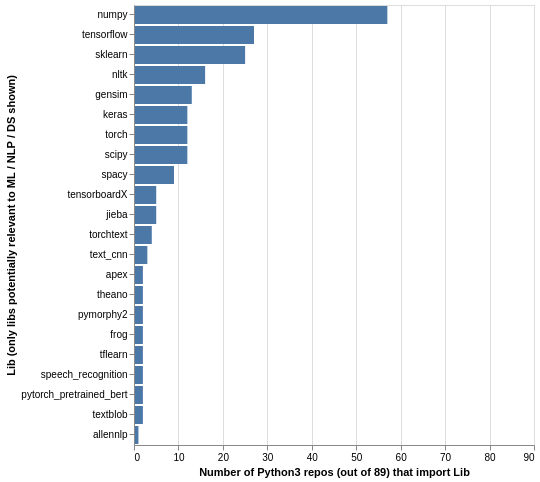

In [71]:
chart = alt.Chart(nlp_df).mark_bar().encode(
    x = alt.X('cnt', title="Number of Python3 repos (out of %s) that import Lib" % num_repos, scale=alt.Scale(domain=(0,int(num_repos)))),
    y = alt.Y('lib', title="Lib (only libs potentially relevant to ML / NLP / DS shown)", sort=alt.EncodingSortField(order="descending")),
)
chart

In [72]:
chart.save("imports.png")